In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.1):
        self.num_inputs = num_inputs
        self.learning_rate = learning_rate
        self.weights = np.zeros(num_inputs)
        self.bias = 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        while True:
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if np.all([self.predict(inputs) == label for inputs, label in zip(training_inputs, labels)]):
                break

or_gate_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_gate_labels = np.array([0, 1, 1, 1])

and_gate_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_gate_labels = np.array([0, 0, 0, 1])

or_perceptron = Perceptron(2)
and_perceptron = Perceptron(2)

or_perceptron.train(or_gate_inputs, or_gate_labels)
and_perceptron.train(and_gate_inputs, and_gate_labels)

print("OR gate:")
for inputs in or_gate_inputs:
    output = or_perceptron.predict(inputs)
    print(f"{inputs} -> {output}")

print("\nAND gate:")
for inputs in and_gate_inputs:
    output = and_perceptron.predict(inputs)
    print(f"{inputs} -> {output}")


OR gate:
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1

AND gate:
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


In [ ]:
import pandas as pd
df = pd.read_csv('horseRacing.csv')
df.dropna(inplace=True)
df['price'] = df['price'].apply(lambda x: 0 if x == 0 else 1)

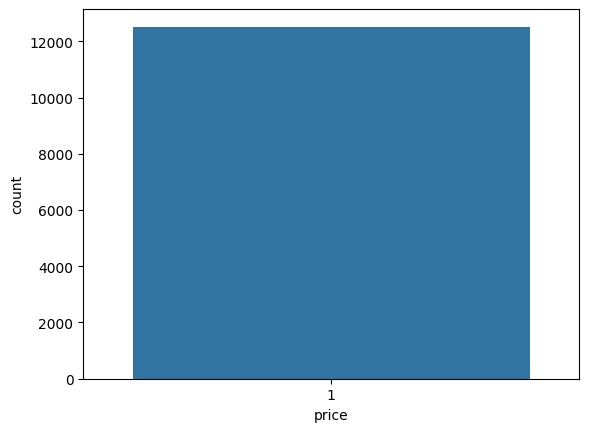

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='price', data=df)
plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['race_id'])

df = pd.get_dummies(df, columns=['horse_id'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0
